# Laboratorio 3 - Regresión Lineal
### Autor: Javier Mombiela
### Fecha: 07-03-2023

In [586]:
#importacion de paquetes
import numpy as np
import matplotlib.pyplot as plt

In [587]:
# definiendo funcion de regresion linear
def linreg(X, y, t, cost, grad, a=0.1, n=100, onStep=None):
    costs = []
    for i in range(n):
        t -= a * grad(X, y, t)
        costs.append(cost(X, y, t))

        if onStep:
            onStep(t)

    return t, costs

# definiendo funciones de costo y gradiante
cost = lambda X,y,t: ((X @ t - y) ** 2).sum() / len(y)
grad = lambda X,y,t : 2 * X.T @ (X @ t - y) / len(y)

## Task 1.1

In [588]:
# Se lee el archivo CSV en el array 'data' el cual ahora puede ser utilizado para realizar operacaciones y analisis de datos.
data = np.genfromtxt('kc_house_data.csv', delimiter=',', skip_header=1)

## Task 1.2

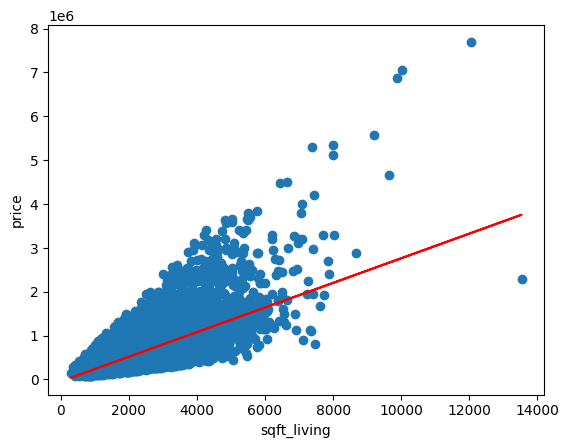

In [589]:
# Extraemos las variables "sqft_living" y "price" del array "data"
X = data[:, 5]  # seleccionar la columna de sqft_living como variable independiente
y = data[:, 2]  # seleccionar la columna de price como variable dependiente

# Ajustamos un modelo polinomial de regresión lineal utilizando la función polyfit()
p = np.polyfit(X, y, 1) # En este caso, utilizamos un modelo de grado 1 (una línea recta)

# Graficamos los datos y la línea de regresión utilizando la librería matplotlib
plt.scatter(X, y) # Graficamos los puntos (X,y) como un scatter plot
plt.plot(X, np.polyval(p, X), 'r') # Graficamos la línea de regresión utilizando los coeficientes de la ecuación de regresión
plt.xlabel('sqft_living') # Etiqueta del eje X
plt.ylabel('price') # Etiqueta del eje Y
plt.show() # Mostramos la gráfica

## Task 1.3

Parámetros de la ecuación de regresión:  [[2.56400332e-01]
 [2.63089086e+02]]


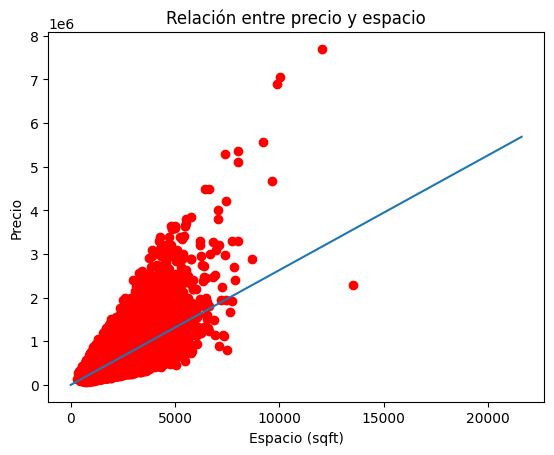

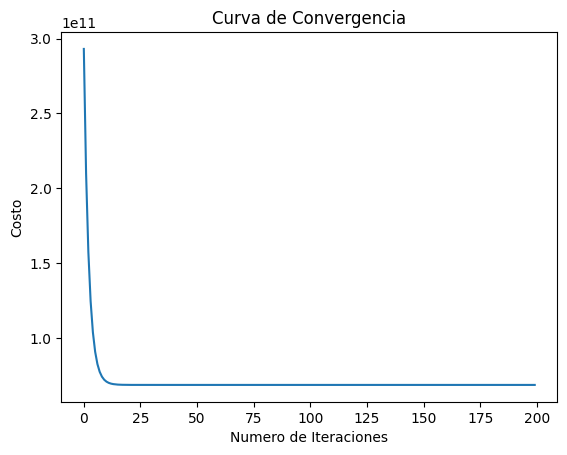

In [590]:
# Obtenemos la informacion del dataset

# Obtenemos el dataset size
dataSize = data.shape[0]  # numero de filas

# Dividimos los datos en variables independientes (X) y dependientes (y)
X = data[:, 5]  # seleccionar la columna de sqft_living como variable independiente
y = data[:, 2]  # seleccionar la columna de price como variable dependiente

# Reorganizamos los datos para que tengan la forma de matriz adecuada para la regresion lineal polinomial
X = X.reshape(-1, 1)  # convertir X en una matriz de una columna
y = y.reshape(-1, 1)  # convertir y en una matriz de una columna

# Agregamos columna de ones a X para agregar el bias
Xr = np.hstack((np.ones_like(X), X))

# Realizamos la regresion lineal 

# Definimos el t inicial como un valor random
to = np.random.rand(Xr.shape[1], 1)

# Realizamos la regresion lineal
tf, costs = linreg(Xr,y,to,cost,grad,a=0.00000002,n=200)

# Imprimimos los parámetros de la ecuación de regresión
print('Parámetros de la ecuación de regresión: ', tf)

# Definimos el valor de xm  
xm = np.array([[0], [dataSize]])
xmr = np.hstack((
    np.ones((2, 1)),
    xm
))

# Definimos ym 
ym = xmr @ tf

# Graficamos los resultados

plt.plot(X, y, 'ro')
plt.plot(xm, ym)
plt.title("Relación entre precio y espacio")
plt.xlabel('Espacio (sqft)')
plt.ylabel('Precio')
plt.show()

plt.plot(costs)
plt.title("Curva de Convergencia")
plt.xlabel('Numero de Iteraciones')
plt.ylabel('Costo')
plt.show()

## Task 1.4

La k óptima es: 2


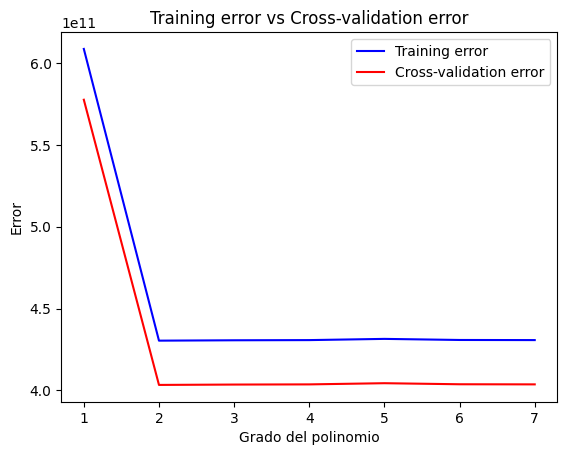

In [591]:
grad = lambda X,y,t : -2 * X.T @ (X @ t - y) / len(y)

# Hacemos shuffle de X
np.random.shuffle(Xr)

# Agregamos el polynomial feature al set
for i in range(2, 6):
    Xr = np.hstack((
        Xr,
        X.reshape((Xr.shape[0], 1)) ** i
    ))

# Dividimos X en training, cross validation y testing
trainingX = X[:int(len(X)*0.4)]
crossValidationX = X[int(len(X)*0.4):int(len(X)*0.8)]
testingX = X[int(len(X)*0.8):]

# Dividimos y en training, cross validation y testing
trainingy = y[:int(len(y)*0.4)]
crossValidationy = y[int(len(y)*0.4):int(len(y)*0.8)]
testingy = y[int(len(y)*0.8):]

# Definimos el valor de xm  
xm = np.array([[0], [dataSize]])
xmr = np.hstack((
    np.ones((2, 1)),
    xm
))

# Definimos el rango de grados de polinomio a probar
degrees = np.arange(1, 8)

# Definimos el valor de K
K = 0

# Inicializamos los vectores de error de entrenamiento y validación cruzada
train_error = np.zeros_like(degrees)
cv_error = np.zeros_like(degrees)

# Creamos listas vacías para almacenar los errores de entrenamiento y validación cruzada para cada grado
train_errors = []
cv_errors = []

a = 0.0000001
for i, degree in enumerate(degrees):
    # Add 3 zeros to the end of a in each iteration
    a /= 1000

    # Agregamos polynomial feature a X
    X_train_poly = np.hstack((trainingX[:, :2], trainingX[:, 2:2*degree+1]))
    X_cv_poly = np.hstack((crossValidationX[:, :2], crossValidationX[:, 2:2*degree+1]))

    # Definimos el t inicial como un valor random
    to = np.random.rand(X_train_poly.shape[1], 1)

    # Realizamos la regresión lineal polinomial
    tf, train_cost = linreg(X_train_poly, trainingy, to, cost, grad, a=a, n=200)

    # Calculamos los errores de entrenamiento y validación cruzada
    train_error = cost(X_train_poly, trainingy, tf)
    cv_error = cost(X_cv_poly, crossValidationy, tf)

    # Agregamos los errores a las listas
    train_errors.append(train_error)
    cv_errors.append(cv_error)


# Encontrar el índice donde el error de validación cruzada es el más bajo
min_cv_error_idx = np.argmin(cv_errors)

# Obtener el grado de polinomio correspondiente a la k óptima
optimal_degree = degrees[min_cv_error_idx]

print("La k óptima es:", optimal_degree)


# Graficamos los errores de entrenamiento y validación cruzada para cada grado
plt.plot(degrees, train_errors, 'b-', label='Training error')
plt.plot(degrees, cv_errors, 'r-', label='Cross-validation error')
plt.legend()
plt.xlabel('Grado del polinomio')
plt.ylabel('Error')
plt.title('Training error vs Cross-validation error')
plt.show()

## Task 1.5

Como podemos observar en el codigo, se está realizando una regresión lineal polinomial para diferentes grados de polinomio y se está evaluando el desempeño del modelo en términos de error de entrenamiento y error de validación cruzada. Se está buscando el grado de polinomio óptimo que minimice el error de validación cruzada, lo cual indica que el modelo generaliza bien a datos nuevos y no está sobreajustando ni subajustando.

Según los resultados que se han obtenido, la k óptima es 2, lo cual significa que el grado de polinomio que minimiza el error de validación cruzada es 2. Esto indica que un modelo con un grado de polinomio de 2 es el que mejor generaliza a datos nuevos y tiene un equilibrio entre sesgo y varianza.

Al graficar los errores de entrenamiento y validación cruzada para cada grado de polinomio, se puede observar cómo los errores varían con diferentes grados de polinomio. Es normal que el error de entrenamiento disminuya a medida que aumenta el grado de polinomio, ya que un modelo más complejo puede ajustarse mejor a los datos de entrenamiento. Sin embargo, el error de validación cruzada puede aumentar a medida que el grado de polinomio aumenta, lo cual indica que el modelo está sobreajustando a los datos de entrenamiento y no generaliza bien a datos nuevos.

En este caso, se puede observar que el error de entrenamiento sigue disminuyendo a medida que aumenta el grado de polinomio, mientras que el error de validación cruzada alcanza un mínimo en el grado de polinomio 2 y luego aumenta. Esto sugiere que un modelo con un grado de polinomio mayor a 2 estaría sobreajustando a los datos de entrenamiento y no generalizaría bien a datos nuevos. Por lo tanto, se debe elegir un grado de polinomio de 2 para obtener un modelo óptimo.

A continuación, se muestran las listas de costos de entrenamiento y validación cruzada para cada grado de polinomio:

In [592]:
print(train_errors)
print(cv_errors)

[608617708527.7053, 430404079867.9451, 430629953327.6489, 430739266202.94745, 431479866823.46313, 430816768767.51184, 430746319700.901]
[577575018931.605, 403358393568.5127, 403578766399.8984, 403685417701.7317, 404407994424.6436, 403761033410.67523, 403692299470.56836]


Estas listas muestran cómo el error de entrenamiento y el error de validación cruzada varían con diferentes grados de polinomio. Se puede observar que el error de entrenamiento disminuye a medida que aumenta el grado de polinomio, mientras que el error de validación cruzada alcanza un mínimo en el grado de polinomio 2 y luego aumenta. Esto sugiere que un modelo con un grado de polinomio mayor a 2 estaría sobreajustando a los datos de entrenamiento y no generalizaría bien a datos nuevos.